In [55]:
import os,sys, importlib, numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [56]:
# user=os.popen('whoami').read().replace('\n','')
user='mitt-wsl'
print(f'User: {user}')
model = "WV_0_PC_0_EH_0_PS_1_6"

spec = importlib.util.spec_from_file_location("module.name", f'./user/{user}_param.py')
userparam = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = userparam
spec.loader.exec_module(userparam)

checkpoint_dir = userparam.param['model_dir']

result_path = f"{checkpoint_dir}/{model}/test_result/"

User: mitt-wsl


In [57]:
gt = np.load(f'{result_path}true_data.npy'.replace('/mnt/c','C:'))
pd = np.load(f'{result_path}pred_data.npy'.replace('/mnt/c','C:'))

In [58]:
print(gt.shape)
print(pd.shape)

(100, 3, 4, 1, 64, 64)
(100, 3, 3, 1, 64, 64)


Text(0.5, 1.0, 'Relative Error (as compared to off-by-one frame),\nMSE = 307.0021%,\nMedianE = 9417.5653%')

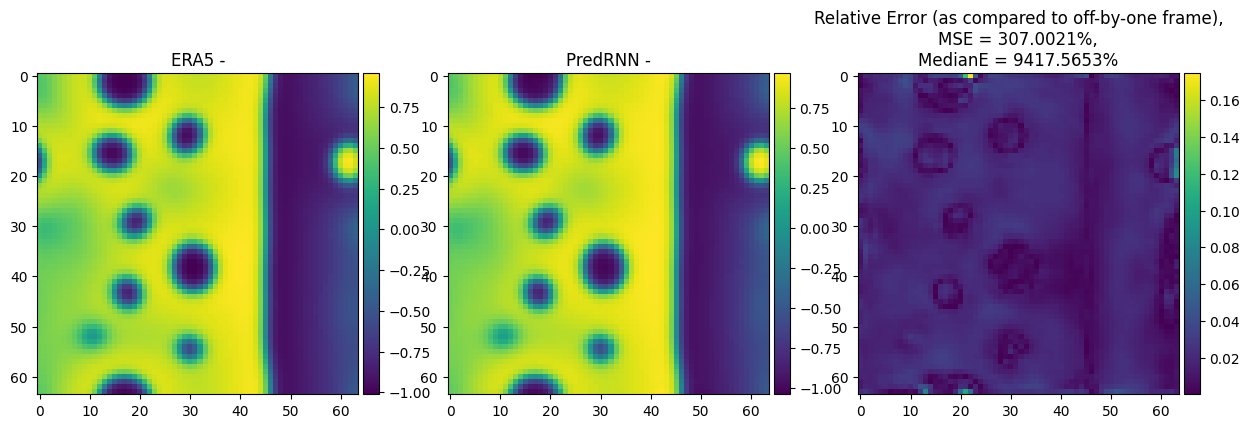

In [97]:
# stepi = 5
# var_dicts = {0:'u wind', 1:'v wind', 2:'Sea Surface Temperature',
#             3:'Surface Pressure', 4:'Precipitation'}
var_dicts = {0:'-',}
shift = len(var_dicts)
var = 0
b = 50
a = 0
stepi = 1

fig, axs = plt.subplots(1,3, figsize=(15,10))
ax0 = axs[0]
im0 = ax0.imshow(gt[b,a,shift+stepi,var,:,:])
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')
ax0.set_title('ERA5 '+var_dicts[var])

ax1 = axs[1]
im1 = ax1.imshow(pd[b,a,stepi,var,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('PredRNN '+var_dicts[var])

ax2 = axs[2]
d = gt[b,a,shift+stepi,var,:,:]-pd[b,a,stepi,var,:,:]
d0 = gt[b,a,shift+stepi+1,var,:,:]-gt[b,a,shift+stepi,var,:,:]
im2 = ax2.imshow(np.abs(d))
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
mse = np.mean(d**2)*100
meanMse = mse / np.mean(d0**2)
medianMse = np.median(d**2)*100 / np.median(d0**2)
ax2.set_title(f'Relative Error (as compared to off-by-one frame),\nMSE = {meanMse:.4f}%,\nMedianE = {medianMse:.4f}%')

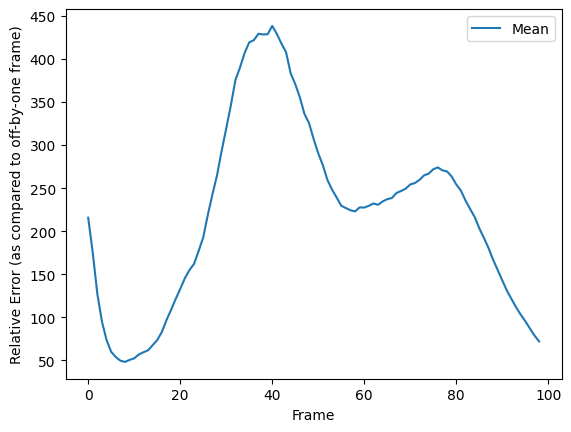

In [99]:
means = []
medians = []
for b in range(1,gt.shape[0]):
    d = gt[b,a,shift+stepi,var,:,:]-pd[b,a,stepi,var,:,:]
    d0 = gt[b,a,shift+stepi+1,var,:,:]-gt[b,a,shift+stepi,var,:,:]
    meanMse = np.mean(d**2)*100 / np.mean(d0**2)
    means.append(meanMse)
    medianMse = np.median(d**2)*100 / np.median(d0**2)
    medians.append(medianMse)
    
plt.plot(means, label='Mean')
# plt.plot(medians, label='Median')
plt.xlabel('Frame')
plt.ylabel('Relative Error (as compared to off-by-one frame)')
plt.legend()
plt.show()